# Fitting 2D nPRFs 

(n1&n2 number info at timepoint of stim2 presentation/decision)

State of the analysis
- originally small but consequential bug in fit_glm_denoise_stim2.py (slicing of image results)
- fix: rerun GLMsingle - stim2 `glm_stim2.denoise`, & already created `encoding_model.2d.cv.mixture.same_rfs` & `decoding.2d.mixture.same_rfs` [Novermber 24]
- missing: `encoding_model_stim2.cv.denoise` with new betas from GLMsingle


In [1]:
import os.path as op
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#bids_folder = '/shares/zne.uzh/mrenke/ds-dnumrisk'
bids_folder = '/mnt_03/ds-dnumrisk'

subjects = [int(f[4:]) for f in os.listdir(bids_folder) if f[0:3] == 'sub' and len(f) == 6]

In [31]:
from numrisk.utils.data import get_data_magjduge

df = get_data_magjduge(bids_folder=bids_folder)
df['log(n2)'] = np.log(df['n2'] )

number of subjects found: 66


In [32]:
subject = '19'
df_behav = df.xs(int(subject), level='subject')
key = f'decoding.2d.mixture.same_rfs'
n_stim = 2

fn = f'sub-{subject}_mask-NPC_R_n_voxels-100_pdf.tsv'

pdf_fn = op.join(bids_folder, 'derivatives', key, f'sub-{subject}', 'func', fn)
pdf = pd.read_csv(pdf_fn, sep='\t', index_col=[0,1], header=[0, 1])


In [ ]:
import numpy as np
import pandas as pd

# Assuming pdf is already defined and has a MultiIndex in columns
idx = pd.IndexSlice
log_min = np.log(5)
log_max = np.log(28 * 4)

# Sort the MultiIndex
pdf = pdf.sort_index(axis=1)

# Ensure the MultiIndex is lexsorted
pdf.columns = pdf.columns.sortlevel()[0]
pdf.columns = pdf.columns.sortlevel(level=[0, 1])[0]

# Restrict the range for both levels of the MultiIndex
restricted_pdf = pdf.loc[:, idx[log_min:log_max, log_min:log_max]]

In [53]:
tmp = pdf.xs(1,level='trial_nr')
tmp.stack().sum(axis=1).droplevel(0)

/tmp/ipykernel_3356745/2941855609.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  tmp.stack().sum(axis=1).droplevel(0)


y
1.6094379425048828    35.699974
1.7917594909667969     6.039999
1.945910096168518      2.842063
2.079441547393799      2.207790
2.1972246170043945     0.926218
2.3025851249694824     0.359404
2.397895336151123      1.777506
2.4849066734313965     5.161739
2.5649492740631104     3.132276
2.6390573978424072     0.250587
2.70805025100708       0.153491
2.7725887298583984     0.990941
2.8332133293151855     1.572931
2.890371799468994      1.463075
2.944438934326172      8.722061
2.995732307434082      7.122647
3.044522523880005      7.094141
3.0910425186157227     7.157486
3.1354942321777344     7.140054
3.178053855895996      7.061518
3.2188758850097656     6.954138
3.25809645652771       6.844901
3.295836925506592      6.751545
3.332204580307007      6.683314
3.367295742034912      6.643285
3.4011974334716797     6.630639
3.4339871406555176     6.642329
3.465735912322998      6.674321
3.4965076446533203     6.722285
3.526360511779785      6.782011
3.5553481578826904     6.849692
3.5835

In [48]:
pdf.stack().sum(axis=1)

/tmp/ipykernel_3356745/1440983839.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  pdf.stack().sum(axis=1)


run  trial_nr  y                 
1    1         1.6094379425048828    35.699974
               1.7917594909667969     6.039999
               1.945910096168518      2.842063
               2.079441547393799      2.207790
               2.1972246170043945     0.926218
                                       ...    
6    180       3.931825637817383     14.583348
               3.9512436389923096    14.381405
               3.97029185295105      14.191334
               3.9889841079711914    14.012480
               4.007333278656006     13.844309
Length: 9180, dtype: float64

In [43]:
(pdf * pdf.columns.get_level_values('x').astype(float)).div(pdf.sum(axis=1), axis=0)


x            1.6094379425048828                                       \
y            1.6094379425048828 1.7917594909667969 1.945910096168518   
run trial_nr                                                           
1   1              1.176250e-04       3.651979e-05          0.000114   
    2              6.521273e-07       8.187947e-05          0.000015   
    3              2.135195e-04       1.238739e-04          0.001181   
    4              5.798357e-04       4.805645e-06          0.000501   
    5              1.100417e-03       1.910669e-05          0.003459   
...                         ...                ...               ...   
6   176            4.084619e-09       8.748476e-07          0.000004   
    177            2.483679e-07       1.021878e-05          0.000018   
    178            6.836846e-06       3.207377e-04          0.001641   
    179            3.613756e-07       1.869301e-06          0.000006   
    180            4.545133e-05       4.825587e-05          0.000059   

x                                                                     \
y            2.079441547393799 2.1972246170043945 2.3025851249694824   
run trial_nr                                                           
1   1                 0.000259           0.000162           0.000070   
    2                 0.000037           0.000090           0.000138   
    3                 0.000970           0.000032           0.000002   
    4                 0.001250           0.001928           0.001496   
    5                 0.005057           0.002066           0.000634   
...                        ...                ...                ...   
6   176               0.000005           0.000005           0.000004   
    177               0.000018           0.000014           0.000009   
    178               0.003057           0.003666           0.003315   
    179               0.000012           0.000016           0.000016   
    180               0.000110           0.000185           0.000234   

x                                                                     \
y            2.397895336151123 2.4849066734313965 2.5649492740631104   
run trial_nr                                                           
1   1                 0.000324           0.000846           0.000461   
    2                 0.000654           0.001588           0.001248   
    3                 0.000044           0.000589           0.000900   
    4                 0.002215           0.002489           0.001176   
    5                 0.001844           0.004190           0.006872   
...                        ...                ...                ...   
6   176               0.000003           0.000002           0.000002   
    177               0.000006           0.000005           0.000005   
    178               0.002860           0.003246           0.003816   
    179               0.000017           0.000024           0.000037   
    180               0.000288           0.000487           0.000824   

x                                ... 4.007333278656006                     \
y            2.6390573978424072  ... 3.828641414642334 3.8501474857330322   
run trial_nr                     ...                                        
1   1                  0.000033  ...          0.002525           0.002520   
    2                  0.000115  ...          0.000317           0.000315   
    3                  0.000348  ...          0.000911           0.000868   
    4                  0.000073  ...          0.000852           0.000835   
    5                  0.002543  ...          0.000751           0.000723   
...                         ...  ...               ...                ...   
6   176                0.000001  ...          0.001454           0.001432   
    177                0.000004  ...          0.000533           0.000523   
    178                0.004122  ...          0.000725           0.000731   
    179                0.000047  ...          0.0

In [36]:
E_n1 = np.exp((pdf * pdf.columns.get_level_values('x').astype(float)).div(pdf.sum(axis=1), axis=0).sum(axis=1))
E_n2 = np.exp((pdf * pdf.columns.get_level_values('y').astype(float)).div(pdf.sum(axis=1), axis=0).sum(axis=1))

E_n1 = E_n1.to_frame(name='E_n1')
E_n2 = E_n2.to_frame(name='E_n2')

In [39]:
df.corr().loc['n1', 'E_n1']

0.13503373858091522

In [40]:
df.corr().loc['n2', 'E_n2']

0.03182434164774179

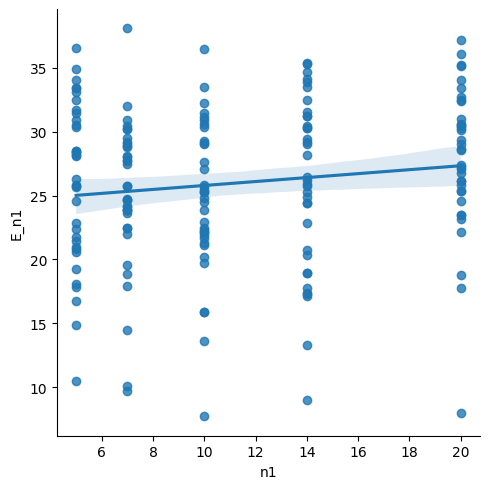

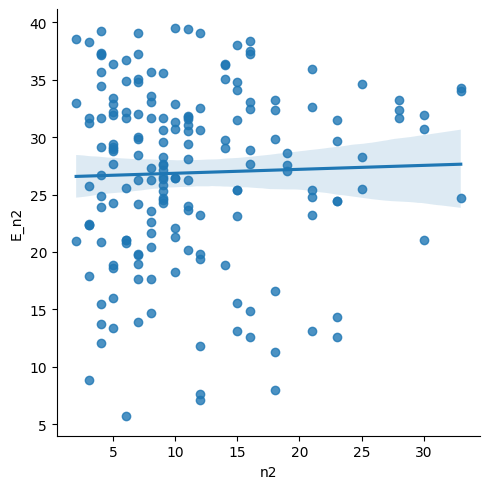

In [37]:
df = E_n1.join(E_n2).join(df_behav[['n1', 'n2', 'log(n2)','log(n1)']])

sns.lmplot(x='n1', y='E_n1', data=df)
sns.lmplot(x='n2', y='E_n2', data=df)

In [ ]:
def get_decoding_info(subject, session=1,n_stim=1,  bids_folder='/data/ds-dnumrisk',key = 'decoded_pdfs.volume', mask='NPC_R', n_voxels='select'): # 

    subject = f'{subject:02d}'
    
    key = f'decoded_pdfs_stim{n_stim}.volume.cv_vselect.denoise'
    fn = f'sub-{subject}_ses-{session}_mask-{mask}_space-T1w_pars.tsv'

    pdf = op.join(bids_folder, 'derivatives', key, f'sub-{subject}', 'func', fn)

    if op.exists(pdf):
        pdf = pd.read_csv(pdf, sep='\t', index_col=[0])
        pdf.columns = pdf.columns.astype(float)
        pdf = pdf.loc[:, np.log(5):np.log(28*4)] # restrict range to actually presensted numeroisities

        E = (pdf*pdf.columns.values[np.newaxis, :] / pdf.sum(1).values[:, np.newaxis]).sum(1)

        E = pd.concat((E,), keys=[(int(subject), int(session), mask, n_voxels)],
        names=['subject', 'session', 'mask', 'n_voxels']).to_frame('E')

        pdf /= np.trapz(pdf, pdf.columns.astype(float))[:, np.newaxis] #normalizing

        E['sd'] = np.trapz(np.abs(E.values - pdf.columns.astype(float).values[np.newaxis, :]) * pdf, pdf.columns, axis=1)
        #print('succesfully predicted')

        return E
    else:
        print(pdf)
        return pd.DataFrame(np.zeros((0, 0)))